In [1]:
import numpy as np

import cv2 as cv
import matplotlib.pyplot as plt

#my functions
from Plot import plot_cv, plot_img

In [8]:
path = '../../../Data/sudoku.png'
img_rgb = cv.imread(path, cv.IMREAD_COLOR_RGB)
img = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
img_rgb.shape, img.shape

((563, 563, 3), (563, 563))

## Hough

- Transformación de coordenadas: Cada punto de un borde en la imagen se mapea a una curva en el espacio de parámetros. Por ejemplo, una línea recta se define por la ecuación: \(\rho =x\cos (\theta )+y\sin (\theta )\), donde \(\rho \) es la distancia desde el origen y \(\theta \) es el ángulo. 

- Acumulación: Se crea una matriz de acumuladores (como una cuadrícula) para el espacio de parámetros. Por cada punto del borde en la imagen, se incrementa el valor de la celda de la matriz que corresponde a los parámetros de la curva que representa.  

- Detección de figuras: Las formas geométricas (como una línea) que están formadas por varios puntos del borde comparten los mismos parámetros en el espacio de parámetros. Por lo tanto, el valor de la celda correspondiente en la matriz de acumuladores aumentará considerablemente. 

- Identificación de picos: Los picos (máximos locales) en la matriz de acumuladores corresponden a las figuras más probables. El punto de la imagen que generó ese pico es la figura detectada. 

In [9]:
def hough_lines(img, edge_thresh=100, theta_res=1, rho_res=1):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    edges = cv.Canny(gray, edge_thresh, edge_thresh * 2)
    h, w = edges.shape
    
    #hough parameters
    thetas = np.deg2rad(np.arange(-90, 90, theta_res))
    diag_len = int(np.hypot(h, w))
    rhos = np.arange(-diag_len, diag_len, rho_res)
    
    accumulator = np.zeros((len(rhos), len(thetas)), dtype=np.uint64)
    
    #votes
    y_idxs, x_idxs = np.nonzero(edges)
    for i in range(len(x_idxs)):
        x, y = x_idxs[i], y_idxs[i]
        for t_idx in range(len(thetas)):
            rho = int(x * np.cos(thetas[t_idx]) + y * np.sin(thetas[t_idx]) + diag_len)
            accumulator[rho, t_idx] += 1

    return accumulator, thetas, rhos, edges

In [14]:
accumulator, thetas, rhos, edges = hough_lines(img_rgb, edge_thresh=40)

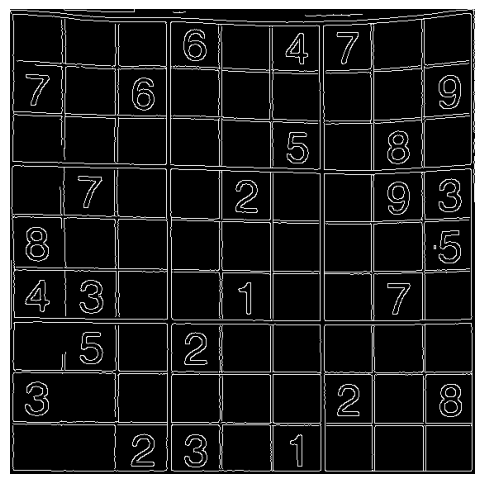

In [15]:
plot_img(edges)

In [16]:
def draw_hough_lines(img, accumulator, thetas, rhos, threshold=100):
    img_out = img.copy()
    diag_len = int(np.hypot(img.shape[0], img.shape[1]))

    peaks = np.argwhere(accumulator > threshold)
    print(f"Detectadas {len(peaks)} líneas con threshold={threshold}")

    for r_idx, t_idx in peaks:
        rho = rhos[r_idx]
        theta = thetas[t_idx]

        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho

        x1 = int(x0 + diag_len * (-b))
        y1 = int(y0 + diag_len * (a))
        x2 = int(x0 - diag_len * (-b))
        y2 = int(y0 - diag_len * (a))

        cv.line(img_out, (x1, y1), (x2, y2), (0, 0, 255), 1, cv.LINE_AA)

    return img_out

Detectadas 73 líneas con threshold=150


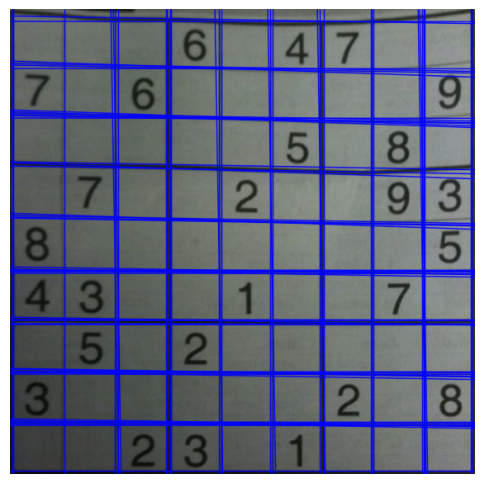

In [21]:
lines = draw_hough_lines(img_rgb, accumulator, thetas, rhos, threshold=150)
plot_img(lines)

## Hough Space

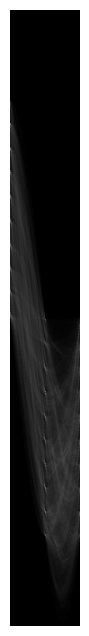

In [27]:
acc_vis = cv.convertScaleAbs(accumulator)
plot_img(acc_vis)